# Optimizing the Ackley Function using the Lichtenberg Algorithm (LA)

In [1]:
from DBM import DielectricBreakdownModel
from LA import LichtenbergFigure, LichtenbergAlgorithm
from func import AckleyFunction

import numpy as np
import matplotlib.pyplot as plt

### Generate a Lichtenberg Figure using DBM or DLA for the algorithm to use

In [2]:
# dbm = DielectricBreakdownModel(eta=5, dim=100, h=1)
# dbm.simulate()
# dbm.show()
# dbm.save('figure2d.npy')

### Visualize how the algorithm samples from an example input space

Here we provide a 2d input plane ranging from (-32, 32) to (32, 32). 

An LF is randomly scaled and rotated on this plane

Then random points are selected from the LF (to be evaluated for fitness)


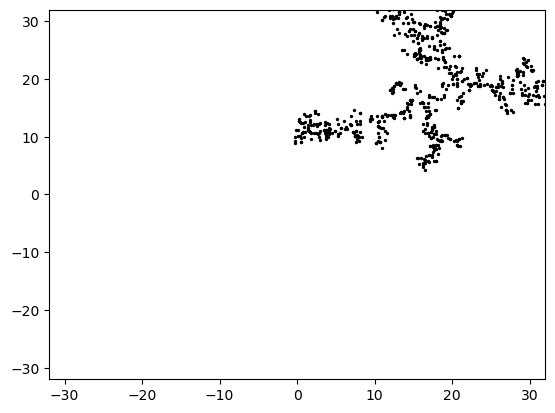

In [5]:
grid = np.load('figure2d.npy')
lf = LichtenbergFigure(grid, (0, 0), (-32, 32))

lf.rand_transform((20, 20))
samples = lf.sample(1000)
x, y = zip(*samples)
plt.scatter(x, y, s=2, c='k')
plt.xlim(-32, 32)
plt.ylim(-32, 32)
plt.show()

### Optimize the Ackley Function

Converged at [-0.029228715696573815, -0.008294244348252988]


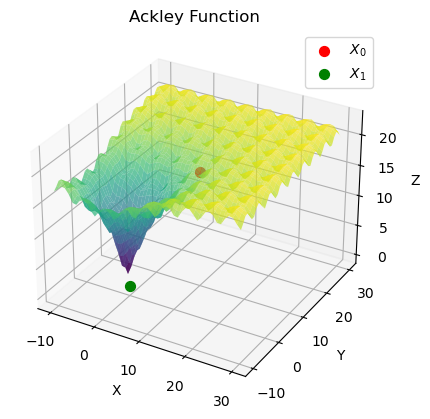

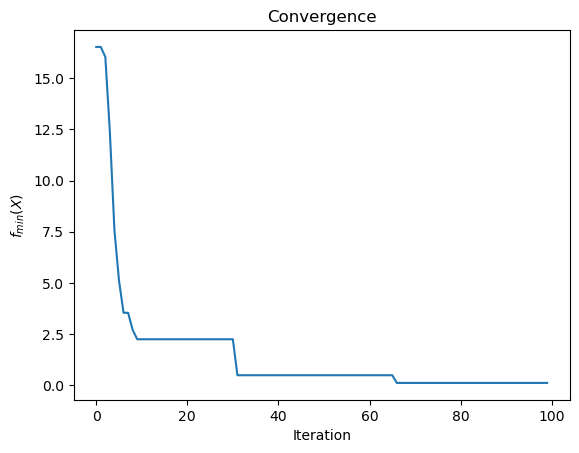

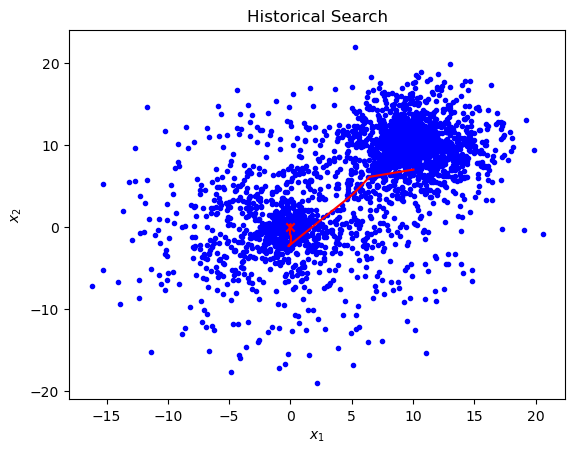

In [45]:
ackley = AckleyFunction()
ackley.lower_bound, ackley.upper_bound = -10, 30

la = LichtenbergAlgorithm(M=2, ref=0.3, filename="figure2d.npy")
optimum = la.optimize(ackley, n_iter=100, pop=30)

print(f"Converged at {optimum}")
ackley.plot3d(ackley.center(), optimum)
la.plot_convergence()
la.plot_historical_search()